# The Copernicus Solar Irradiance Service
The Copernicus Atmosphere Monitoring Service ([CAMS](https://atmosphere.copernicus.eu/)) provides historical data, from 2004 to present, of the downwelling [solar irradiance](https://en.wikipedia.org/wiki/Solar_irradiance) at ground level on horizontal surfaces, integrated over the whole spectrum. The solar irradiance is an essential climate variable to figure out the impact of climate change in most of the economic sectors. The solar irradiance represents the energy per unit time and unit area received from the sun in the form of electromagnetic radiation. It is measured in watts per square metre ($W/m^2$). The solar irradiance data from CAMS is computed from two solar irradiance models. One that doesn't take into account the cloud coverage, so called clear-sky irradiance, and another one that does take into account the cloud cover, called all-sky irradiance. The cloud cover used to compute the all-sky irradiance is available from the [Meteosat 2nd generation](https://www.eumetsat.int/website/home/Satellites/CurrentSatellites/Meteosat/index.html) (MSG) geostationary satellites.

The purpose of this notebook is to

1. Test the CAMS solar radiation web service API
2. Plot the time series data for a given time interval
3. Find out the day of the strongest irradiance attenuation in the given time interval 

## How the solar irradiance is measured at the ground level
Since the energy emitted by the sun is known, it is possible to build a base model of the solar irradiance that should arrive at the ground level at any location, longitude and latitude, and at any given time in a year if the atmosphere was absent. 

### Clear-sky solar irradiance
The constituents of the atmosphere, such as ozone, aerosols and water vapour, absorb and scatter the radiation resulting in a decreased irradiance that can be observed at the ground level. A more sophisticated computational model than the base one discussed above, can take into account the constituents of the atmosphere and other parameters such as the temperature profile and pressure to compute the solar irradiance under clear-sky conditions, that is a sky without cloud cover. This is the type of model used by CAMS to compute the clear-sky solar irradiance. 

### All-sky solar irradiance
As everyone knows by experience, clouds have a strong impact on the solar irradiance that arrives at the ground level. Since the Meteosat satellites provide data about the cloud coverage in a continuous way, the solar irradiance model can remove from the clear-sky solar irradiance the quantity that is absorbed and scattered by the clouds when and where they are present. This quantity is computed from the physical characteristics of the clouds that can be inferred from their reflectance. Since the MSG satellites cover only Europe, Africa, the Atlantic Ocean and the Middle East, the all-sky solar irradiance values are not available in other regions. More information about the computational models is available in the referred papers at the end of the notebook.

## The CAMS solar radiation web service
CAMS provide the solar irradiance data as open data, available to all for free, through a web page and a web service. A user can select 

- the location of interest 
- the time period
- the integration time of each record, from 1 minute to 1 hour
- the format of the data (CSV, NetCDF)

In this notebook we use the web service through its API. In order to use the API, you have to be registered into the CADS and

1. login 
2. copy your CDS API key in the .condarc file in your home folder 
3. install the cdsapi Python package

For more information follow the [how-to instructions](https://ads.atmosphere.copernicus.eu/api-how-to).

We import all the Python packages that will be used to retrieve the data. We will import additional packages later on for plotting the time series.

In [1]:
import pandas as pd
import cdsapi
from platform import python_version
print("python version: %s"%python_version())
print("pandas version: %s"%pd.__version__)

python version: 3.7.4
pandas version: 0.25.1


### Retrieving the solar irradiance data
We use the CAMS web service to retrieve the solar irradiance data computed for Luxembourg, whose latitude and longitude are (49.61, 6.13), in the time period between June 1st 2019 and June 30th 2019. As soon as the request is completed a CSV file will be downloaded in the current folder. 

In [68]:
c = cdsapi.Client()

c.retrieve(
    'cams-solar-radiation-timeseries',
    {
        'sky_type': 'observed_cloud',
        'location': {
            'latitude': 49.61,
            'longitude': 6.13,
        },
        'altitude': '-999.',
        'date': '2019-06-01/2019-06-30',
        'time_step': '1hour',
        'time_reference': 'universal_time',
        'format': 'csv',
    },
    'download.csv')

2020-10-04 22:57:51,353 INFO Welcome to the CDS
2020-10-04 22:57:51,362 INFO Sending request to https://ads.atmosphere.copernicus.eu/api/v2/resources/cams-solar-radiation-timeseries
2020-10-04 22:57:51,528 INFO Request is queued
2020-10-04 22:57:52,569 INFO Request is running
2020-10-04 22:57:59,811 INFO Request is completed
2020-10-04 22:57:59,816 INFO Downloading http://136.156.133.80/cache-compute-0002/cache/data9/adaptor.cams_solar_rad2.retrieve-1601845071.1213765-31279-5-422340f4-513d-4a56-97fc-5ddfa27701f7.csv to download.csv (90.3K)
2020-10-04 22:58:00,140 INFO Download rate 283.3K/s


Result(content_length=92478,content_type=text/plain,location=http://136.156.133.80/cache-compute-0002/cache/data9/adaptor.cams_solar_rad2.retrieve-1601845071.1213765-31279-5-422340f4-513d-4a56-97fc-5ddfa27701f7.csv)

We read the CSV file and print the first rows to have a look at the data.

In [69]:
solar_dataset = pd.read_csv("download.csv", sep=';', skiprows=42)
solar_dataset[0:5]

,# Observation period,TOA,Clear sky GHI,Clear sky BHI,Clear sky DHI,Clear sky BNI,GHI,BHI,DHI,BNI,Reliability
0,2019-06-01T00:00:00.0/2019-06-01T01:00:00.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.00
1,2019-06-01T01:00:00.0/2019-06-01T02:00:00.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.00
2,2019-06-01T02:00:00.0/2019-06-01T03:00:00.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.00
3,2019-06-01T03:00:00.0/2019-06-01T04:00:00.0,10.5260,2.9571,0.5479,2.4093,14.5356,2.8616,0.5159,2.3458,13.8228,0.85
4,2019-06-01T04:00:00.0/2019-06-01T05:00:00.0,161.7954,78.1376,42.4882,35.6494,311.0478,56.4455,7.6101,48.8354,51.6211,1.00


The data set contains the Global Horizontal Irradiance (GHI), the Diffuse Horizontal Irradiance (DHI) and the Beam Normal Irradiance (BNI) for both the clear-sky and all-sky models. In this notebook we use only the GHI and clear-sky GHI. The GHI is the sum of the direct irradiance and the diffuse irradiance on a horizontal surface. 

## Finding out the day with the strongest irradiance attenuation
We want to plot the clear-sky GHI and the all-sky GHI and then we will find out the day in which the attenuation of the solar irradiance was the strongest in the selected period.

### Pandas Time Series
We use the Pandas Series object to handle the time series data. The Pandas Series can use timestamps as an index instead of integers as in an array. We first build the index object from the time stamps available in the data and then we'll use the index and the irradiance values to build a time series object.

In [16]:
hourly_observations = solar_dataset['# Observation period']
dates_left = [observation.split('/')[0] for observation in hourly_observations]
dates_index = pd.to_datetime(dates_left)
dates_index[0:5]

DatetimeIndex(['2019-06-01 00:00:00', '2019-06-01 01:00:00',
               '2019-06-01 02:00:00', '2019-06-01 03:00:00',
               '2019-06-01 04:00:00'],
              dtype='datetime64[ns]', freq=None)

Now we create the clear-sky irradiance time series.

In [70]:
cs_ghi = solar_dataset['Clear sky GHI']
cs_ghi_ts = pd.Series(cs_ghi.values, index=dates_index)

In the same way we create the all-sky irradiance time series

In [71]:
ghi = solar_dataset['GHI']
ghi_ts = pd.Series(ghi.values, index=dates_index)

### Plotting the solar irradiance
We compute the start and end date of the selected period that will be used to print the tick labels of the plotted data.

In [7]:
start_day = dates_index[0].strftime('%Y-%m-%d')
end_day = dates_index[dates_index.size - 1].strftime('%Y-%m-%d')
days = pd.date_range(start_day, end_day, freq='D')
print("Start day: {0:4s}\nEnd day: {1:4s}".format(start_day, end_day))

Start day: 2019-06-01
End day: 2019-06-30


In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
import matplotlib.dates as mdates

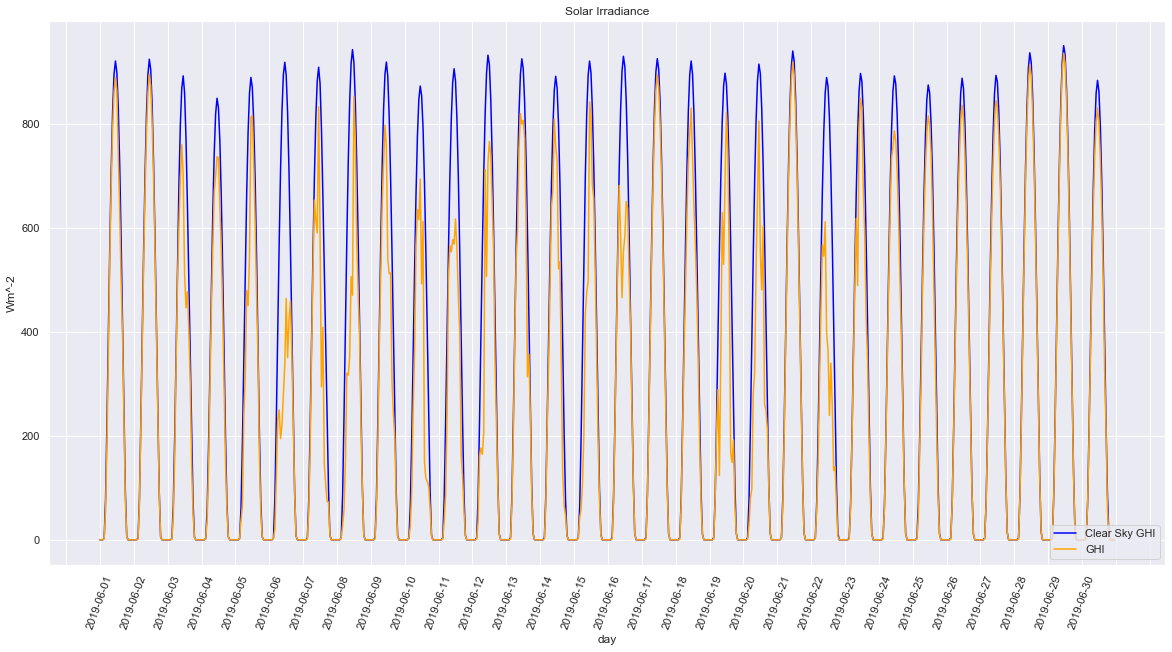

In [63]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot()
ax.set_title("Solar Irradiance")
ax.set_xlabel("day")
ax.set_ylabel("Wm^-2");
ax.set_xticks(days)
ax.set_xticklabels(days.format('%Y-%m-%d'), rotation=70)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
plt_cs_ghi = plt.plot(cs_ghi_ts, color='blue')
plt_ghi = plt.plot(ghi_ts, color='orange')
plt.legend((plt_cs_ghi[0], plt_ghi[0]), ['Clear Sky GHI', 'GHI'], loc='lower right')

### Extracting the daily maximum GHI and Clear-sky GHI
We extract the GHI and Clear-sky GHI daily maximum values from the hourly observations.

In [61]:
daily_max_ghi = [ghi_ts[day.strftime('%Y-%m-%d')].max() for day in days]
daily_max_ghi_ts = pd.Series(daily_max_ghi, index=days)
daily_max_ghi_ts.min()

464.3157

In [62]:
daily_max_cs_ghi = [cs_ghi_ts[day.strftime('%Y-%m-%d')].max() for day in days]
daily_max_cs_ghi_ts = pd.Series(daily_max_cs_ghi, index=days)
daily_max_cs_ghi_ts.min()

849.5671

### Strongest irradiance attenuation

In [73]:
ratios = [daily_max_ghi_ts[day] / daily_max_cs_ghi_ts[day] for day in days] 
ratios_ts = pd.Series(ratios, index=days)
min_ratio = ratios_ts.min()
strongest_attenuation_day = ratios_ts.idxmin()
strongest_attenuation_day.strftime('%Y-%m-%d')

'2019-06-06'

### References
- [M. Lefevre et al. McClear: a new model estimating downwelling solar radiation at ground level in clear-sky conditions](https://amt.copernicus.org/articles/6/2403/2013/amt-6-2403-2013.pdf)
- [Qu et al. Fast radiative transfer parameterisation for assessing the surface solar irradiance: The Heliosat‑4 method](https://dx.doi.org/10.1127/metz/2016/0781)